# Linear Regression

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, you have to predict the house prices.

Description of some fields ([all fields description](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)):
+ **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
+ **OverallQual**: Overall material and finish quality
+ **GrLivArea**: Above grade (ground) living area square feet
+ **GarageCars**: Size of garage in car capacity
+ **GarageArea**: Size of garage in square feet
+ **TotalBsmtSF**: Total square feet of basement area

```
```
```
```

_Sources and useful references:_
- [House Prices: Advanced Regression Techniques (Kaggle Challenge)](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)
- [Predicting House Prices with Linear Regression](https://medium.com/@curiousily/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1)
- [Linear Regression using Python](https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2)
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# Load useful libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load data
data = pd.read_csv('data/house_prices_train_data.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data exploration and visualization

In [ ]:
# DataFrame.describe() generates descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset’s distribution, excluding NaN values

data.SalePrice.describe()   # data["SalePrice"].describe() does the same

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


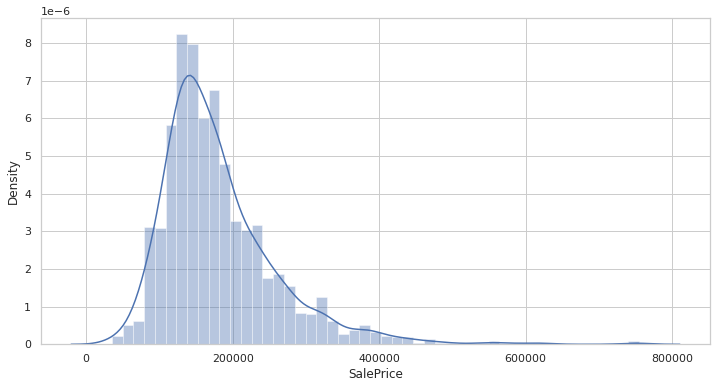

In [ ]:
# Plot the prices distribution plot
sns.set(style='whitegrid', rc={'figure.figsize':(12,6)})
sns.distplot(data.SalePrice);

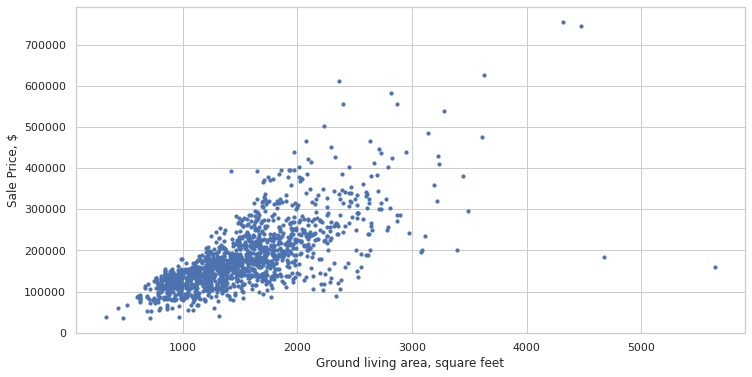

In [ ]:
# Plot sale price as a function of ground living area
plt.figure(figsize=(12,6))
plt.scatter(data.GrLivArea, data.SalePrice, s=10)
plt.grid(True)
plt.xlabel("Ground living area, square feet")
plt.ylabel("Sale Price, $");  # ";" - to suppress an automatic output of the last row of the cell

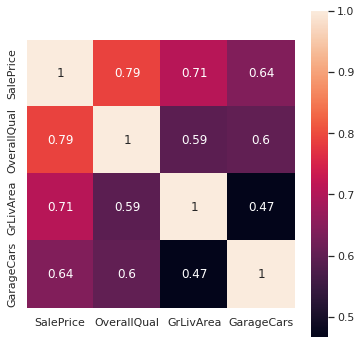

In [ ]:
# Obtain top 3 correlated features for the SalePrice
correlation_matrix = data.corr()  # get correlation matrix for all features and the target (SalePrice)
top3 = correlation_matrix.nlargest(4, 'SalePrice').SalePrice.index  # "4" = 3 features + SalePrice; ".index" - get row names 
fig, ax = plt.subplots(figsize=(6,6))  # set the size of the following plot 
sns.heatmap(data[top3].corr(), square=True, annot=True);

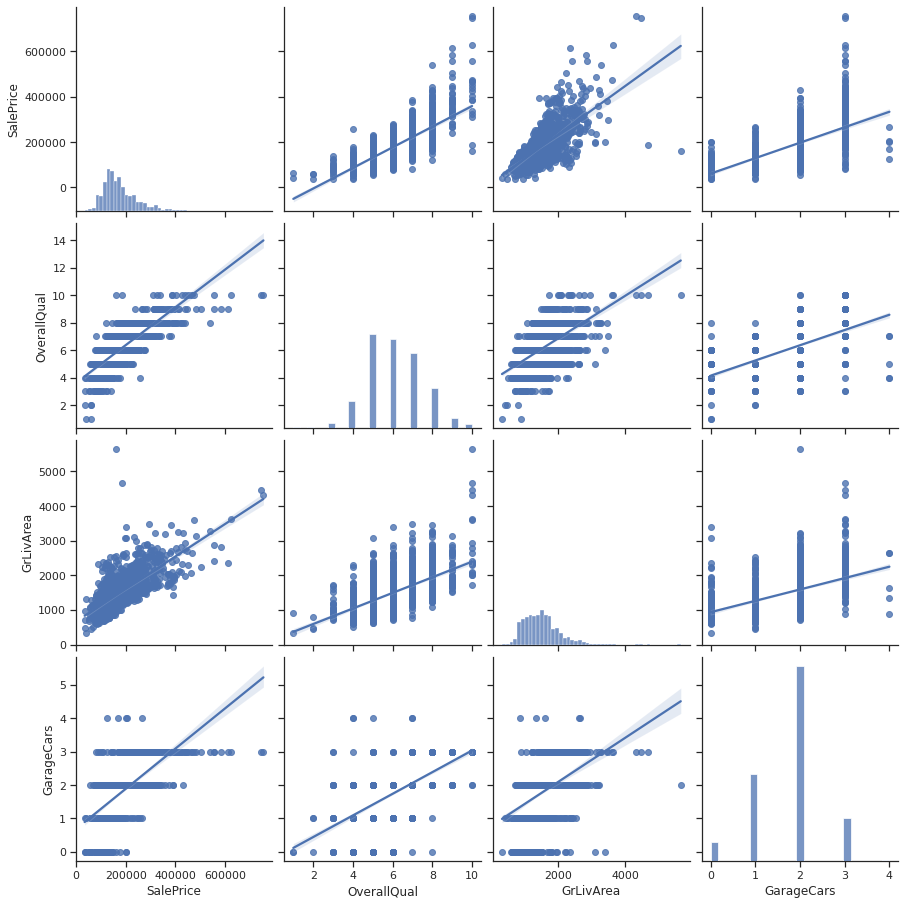

In [ ]:
# Let's see more SalePrice correlation details (with top 3 features)
sns.set(style='ticks')
sns.pairplot(data[top3], kind="reg", height = 3.2);

In [ ]:
# Check whether we have missing data for our top 3 features
missing_data = data.isnull().sum().sort_values(ascending=False)
missing_data[top3]

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
dtype: int64

## Predicting the sale price using one feature (Simple Linear Regression)

To evaluate the performance of a model, we will be using **Root Mean Squared Error (RMSE)** and the **Coefficient of Determination ($R^2$ score)**.

**RMSE** is the square root of the average of the sum of the squares of residuals.

**RMSE** is defined by

$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2}$$

**$R^2$ score** or the **coefficient of determination** explains how much the total variance of the dependent variable can be reduced by using the least square regression.

**$R^2$** is determined by

$$R^2=1-\frac{SS_r}{SS_t}$$

**$SS_t$** is the total sum of errors if we take the mean of the observed values as the predicted value.

$$SS_t=\sum_{i=1}^{m}(y^{(i)}-\bar{y})^2$$

**$SS_r$** is the sum of the square of residuals

$$SS_r=\sum_{i=1}^{m}(h(x^{(i)})-y^{(i)})^2$$

### 1. Scikit-learn LinearRegression model implementation

Root mean squared error: 3139843209.67
R2 score: 0.502
Intercept: 18569.03
Slope: 107.13


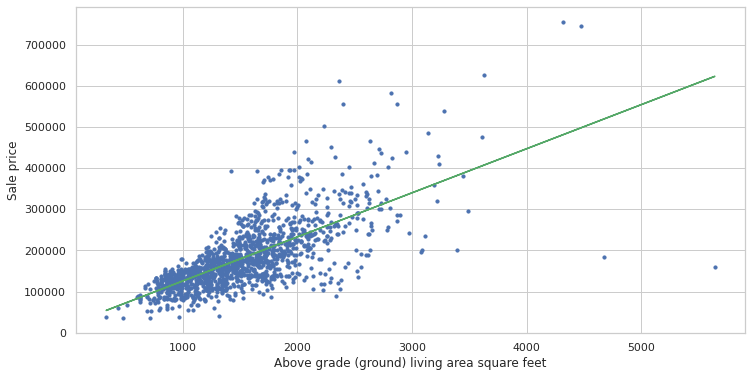

In [ ]:
# Use scikit-learn linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Save RMSE and R2 values for future use
rmse_list = []
r2_list = []

# Build scikit-learn linear regression model
def LinearRegressionSklearn(x, y):
    # Model initialization
    model = LinearRegression()

    # Train the model
    model.fit(x, y)

    # Make prediction
    y_predicted = model.predict(x)

    # Evaluate the model
    rmse = mean_squared_error(y, y_predicted)
    rmse_list.append(rmse)
    r2 = r2_score(y, y_predicted)
    r2_list.append(r2)

    print('Root mean squared error: {:.2f}'.format(rmse))
    print('R2 score: {:.3f}'.format(r2))
    
    return model, y_predicted


# Select second best feature and the target
x = data[["GrLivArea"]]
y = data["SalePrice"]

# Model initialization
model, y_predicted = LinearRegressionSklearn(x,y)

# Display coefficients values (theta_0 and theta_1)
print('Intercept: {:.2f}'.format(model.intercept_))
print('Slope: {:.2f}'.format(model.coef_[0]))

# Plot the result
sns.set(style='whitegrid')
plt.scatter(x, y, s=10)
plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale price')
plt.plot(x, y_predicted, color='g')
plt.show()

Root mean squared error: 2360934371.57
R2 score: 0.626
Intercept: -96206.08
Slope: 45435.80


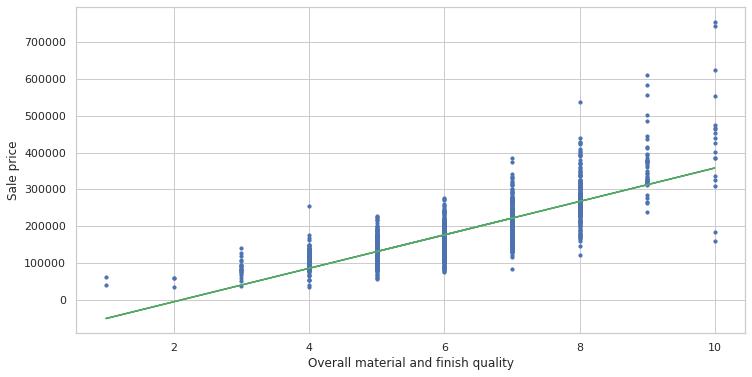

In [ ]:
# Select best feature and the target
x1 = data[["OverallQual"]]
y1 = data["SalePrice"]

# Model initialization
model1, y_predicted = LinearRegressionSklearn(x1, y1)

# Display coefficients values (theta_0 and theta_1)
print('Intercept: {:.2f}'.format(model1.intercept_))
print('Slope: {:.2f}'.format(model1.coef_[0]))

# Plot the result
sns.set(style='whitegrid')
plt.scatter(x1, y1, s=10)
plt.xlabel('Overall material and finish quality')
plt.ylabel('Sale price')
plt.plot(x1, y_predicted, color='g')
plt.show()

### 2. NOW YOUR TURN: Linear Regression from scratch

Build your own linear regression model:
+ write `loss` function
+ write `predict` method
+ complete `fit` method

Try different values of learning rate and a number of iterations:
+ learning_rate=0.001, number_of_iterations=10
+ learning_rate=0.001, number_of_iterations=100
+ learning_rate=0.001, number_of_iterations=1000
+ learning_rate=0.01, number_of_iterations=1000
+ learning_rate=0.03, number_of_iterations=1000
+ learning_rate=0.05, number_of_iterations=1000  **==>  Do you see something interesting? Think about the reason for it.**
+ learning_rate=0.03, number_of_iterations=10000

In [ ]:
# This function is just for convenience. You can study it later.
def print_and_plot_results(x, y, x2, x2_ones, y2, model1, model2):
    # Compare weights of the trained models
    print('Model 1, Intercept: {:.2f}'.format(model1.intercept_))
    print('Model 1, Slope: {:.2f}'.format(model1.coef_[0]))
    print('Model 2, Intercept: {:.2f}'.format(model2.weights[0]))
    print('Model 2, Slope: {:.2f}'.format(model2.weights[1]))

    # Plot the results
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(1, 2, figsize=(16,6))

    ax[0].scatter(x2, y2, s=10)
    ax[0].set(xlabel='Overall material and finish quality', ylabel='Sale price')
    ax[0].plot(x, model1.predict(x), color='g', label='model 1 (sklearn)')
    ax[0].plot(x2, model2.predict(x2_ones), color='r', label='model 2 (custom)')
    ax[0].legend()

    # Plot cost function
    ax[1].set(xlabel='No. of iterations', ylabel='Cost', title='Cost Function J')
    ax[1].plot(model2.cost_history)
    plt.show()    

In [ ]:
# Build your linear regression model
class LinearRegressionCustom: #  for using GridSearchCV -> class LinearRegressionCustom(BaseEstimator)
    """
    Linear Regression from scratch using gradient descent.
    
    """
    
    def __init__(self, learning_rate=0.001, number_of_iterations=1_000):
        self.learning_rate = learning_rate
        self.number_of_iterations = number_of_iterations
    
    
    def loss(self, residuals):        
        """Calculate loss"""
        # Hint: use np.sum() or np.dot()
        return np.sum(residuals ** 2) / (2 * self.m)

    def predict(self, x):
        """Make prediction (calculate y_pred)"""     
        # Hint: np.dot() may be useful
        return x @ self.weights
    
    def fit(self, x, y):
        """Training/fitting model"""
        # Initialize cost history (for the next plot)
        self.cost_history = []     
        
        # Get the number of samples
        self.m = x.shape[0]
        
        # Initialize weights, i.e., theta_0 and theta_1
        # Hint: use np.zeros() and x.shape
        self.weights = np.zeros(x.shape[1])
  
        # Train the model
        for _ in range(self.number_of_iterations):
            
            # Calculate prediction/hypothesis            
            y_pred = self.predict(x)   # that's why you wrote self.predict()
            # Update weights
            residuals = y_pred - y
            gradient = np.dot(x.T, residuals) / self.m
            self.weights -= self.learning_rate * gradient
            
            # Calculate loss and cost
            cost = self.loss(residuals)   # do not forget about self.loss()
            self.cost_history.append(cost)

Model 1, Intercept: -96206.08
Model 1, Slope: 45435.80
Model 2, Intercept: -46917.04
Model 2, Slope: 37740.24


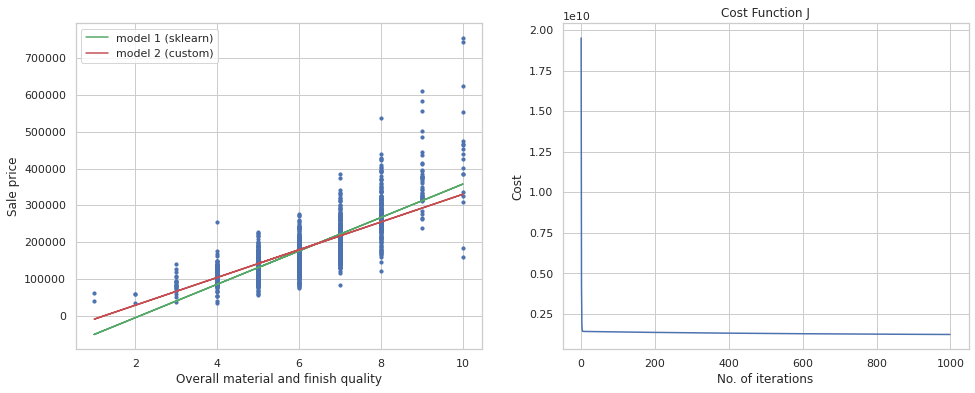

In [ ]:
# Prepare data for your model
x2 = data["OverallQual"]
y2 = data["SalePrice"]

# Add ones for intercept (theta_0) coefficient, i.e., set x_0 = 1 for vectorization purpose
# Hint: np.c_() and np.ones() may be useful
x2_ones = np.c_[np.ones(x2.shape[0]), x2.values]

# Train the custom model
model2 = LinearRegressionCustom(learning_rate=0.015, number_of_iterations=1_000)  # let's tinkering with these parameters
model2.fit(x2_ones, y2)

# Print and plot the results
print_and_plot_results(x1, y1, x2, x2_ones, y2, model1, model2)

In [ ]:
# from sklearn.model_selection import GridSearchCV
# import warnings
# warnings.simplefilter("ignore")

# params = {'learning_rate' : [.001, .01, .03, .05],
#           'number_of_iterations' : [10, 1_00, 1_000, 10_000]}


# reg = GridSearchCV(LinearRegressionCustom(), params, scoring='r2', cv=3)
# reg.fit(x2_ones, y2)
# reg.best_params_

In [ ]:
attempt = {.001 : [10, 100, 1_000],
           .01 : [1_000],
           .03 : [1_000],
           .05 : [1_000],
           .03 : [10_000]}

In [ ]:
from tqdm import tqdm

In [ ]:
models = []
for learning_rate, itarations_list in tqdm(attempt.items()):
    for itr in itarations_list:
        print(learning_rate, itr)
        model = LinearRegressionCustom(learning_rate, itr)
        model.fit(x2_ones, y2)
        models.append(model)

  0%|          | 0/4 [00:00<?, ?it/s]

0.001 10
0.001 100
0.001 1000


 25%|██▌       | 1/4 [00:00<00:01,  1.67it/s]

0.01 1000


 50%|█████     | 2/4 [00:01<00:01,  1.81it/s]

0.03 10000


 75%|███████▌  | 3/4 [00:06<00:02,  2.65s/it]

0.05 1000


100%|██████████| 4/4 [00:06<00:00,  1.70s/it]


In [ ]:
models

learning_rate = 0.001 
 number_of_iterations = 10
Model 1, Intercept: -96206.08
Model 1, Slope: 45435.80
Model 2, Intercept: 1507.74
Model 2, Slope: 9972.47


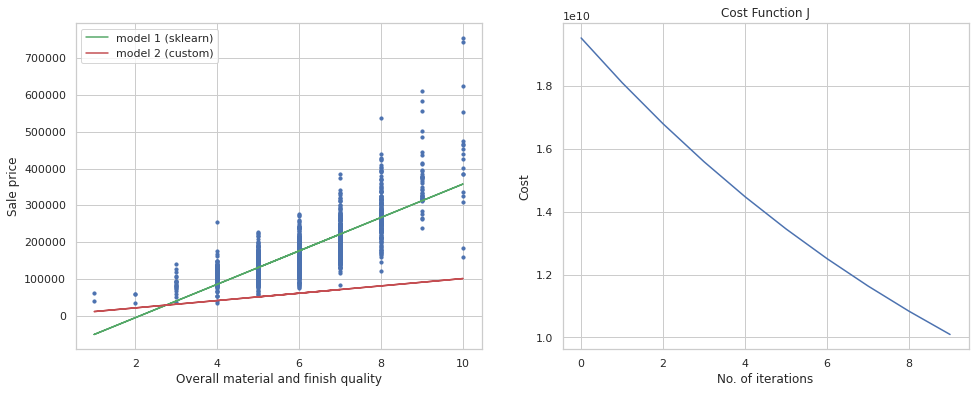

learning_rate = 0.001 
 number_of_iterations = 100
Model 1, Intercept: -96206.08
Model 1, Slope: 45435.80
Model 2, Intercept: 4078.11
Model 2, Slope: 29268.67


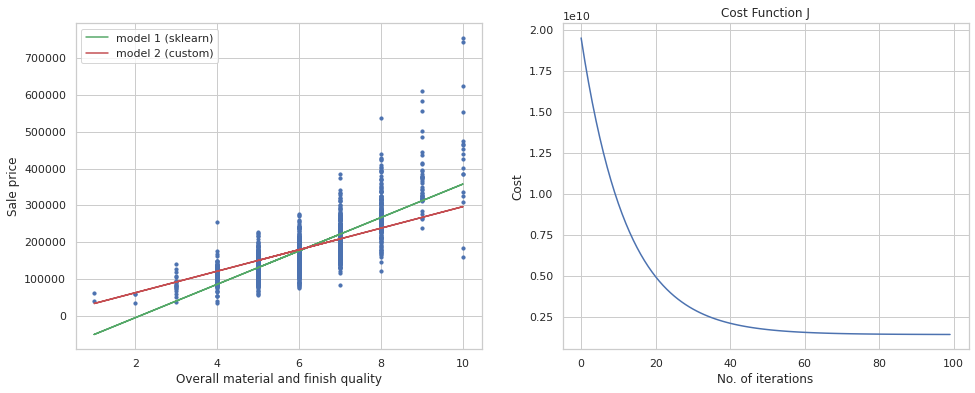

learning_rate = 0.001 
 number_of_iterations = 1000
Model 1, Intercept: -96206.08
Model 1, Slope: 45435.80
Model 2, Intercept: -62.22
Model 2, Slope: 30424.74


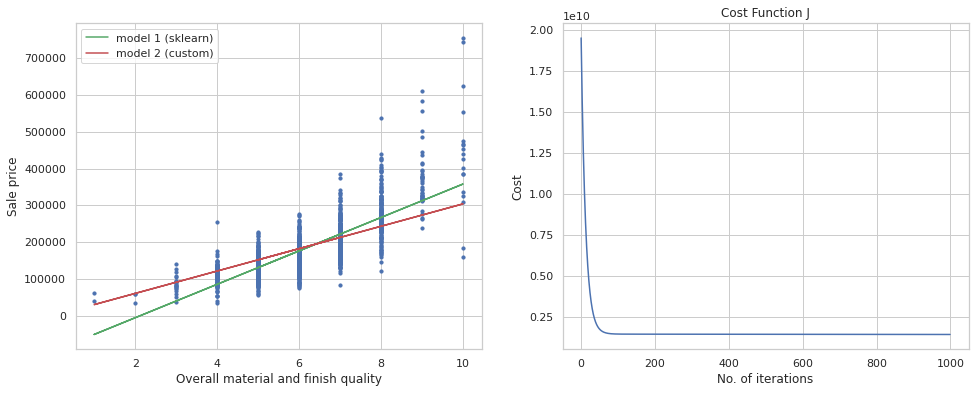

learning_rate = 0.01 
 number_of_iterations = 1000
Model 1, Intercept: -96206.08
Model 1, Slope: 45435.80
Model 2, Intercept: -33630.46
Model 2, Slope: 35665.79


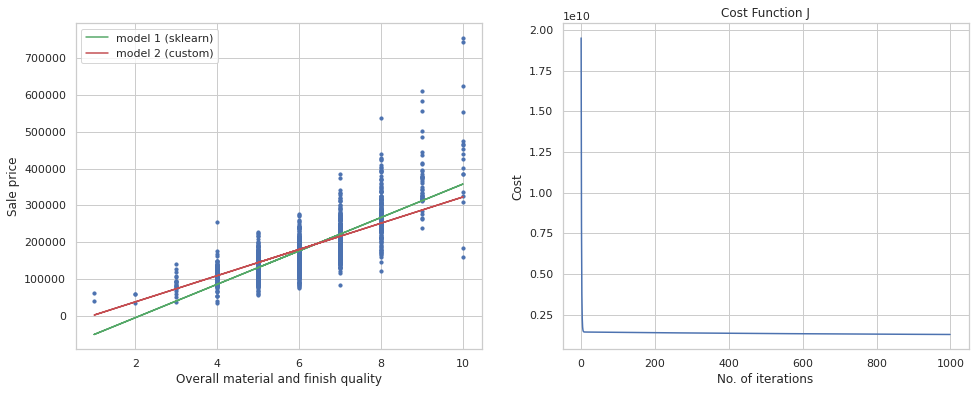

learning_rate = 0.03 
 number_of_iterations = 10000
Model 1, Intercept: -96206.08
Model 1, Slope: 45435.80
Model 2, Intercept: -96206.02
Model 2, Slope: 45435.79


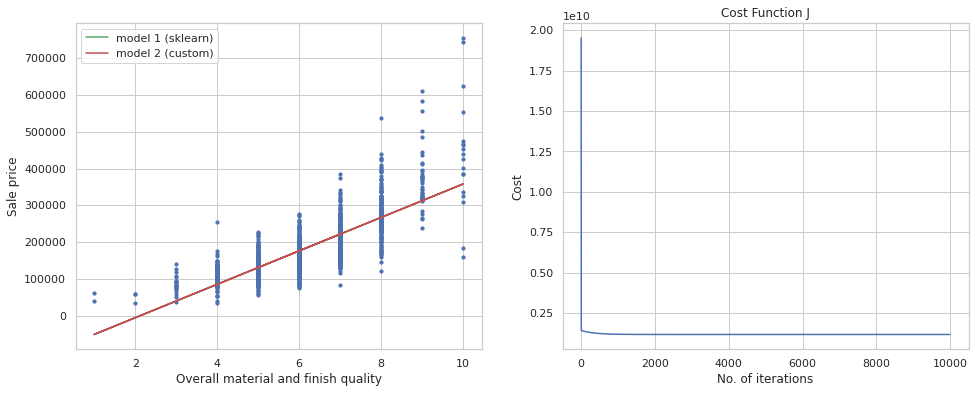

learning_rate = 0.05 
 number_of_iterations = 1000
Model 1, Intercept: -96206.08
Model 1, Slope: 45435.80
Model 2, Intercept: -207713.46
Model 2, Slope: -729489.77


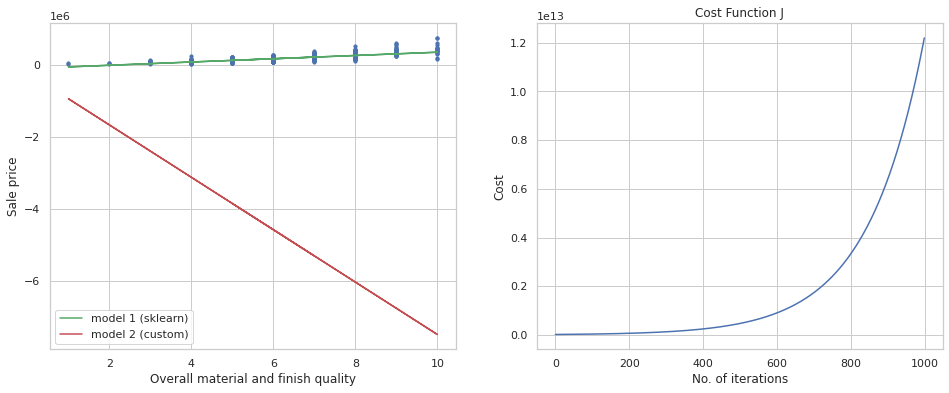

In [ ]:
for m in models:
    print(f"learning_rate = {m.learning_rate} \n number_of_iterations = {m.number_of_iterations}")
    print_and_plot_results(x1, y1, x2, x2_ones, y2, model1, m)

## Multiple Linear Regression

In [ ]:
# Two best features together
x = data[['OverallQual', 'GrLivArea']]
y = data["SalePrice"]

# Train and evaluate the model
model3,_ = LinearRegressionSklearn(x, y)

Root mean squared error: 1802649051.76
R2 score: 0.714


In [ ]:
# Three best features
x = data[['OverallQual', 'GrLivArea', 'GarageCars']]
y = data["SalePrice"]

# Train and evaluate the model
model4,_ = LinearRegressionSklearn(x, y)

Root mean squared error: 1645634055.53
R2 score: 0.739


In [ ]:
# Five best features
x = data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
y = data["SalePrice"]

# Train and evaluate the model
model5,_ = LinearRegressionSklearn(x, y)

Root mean squared error: 1506639420.84
R2 score: 0.761


In [ ]:
# Let's add complex feature
data['GrLivAreaGarageCars'] = data['GrLivArea'] * data['GarageCars']
x = data[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GrLivAreaGarageCars']]
y = data["SalePrice"]

# Train and evaluate the model
model6,_ = LinearRegressionSklearn(x, y)

Root mean squared error: 1342284251.76
R2 score: 0.787


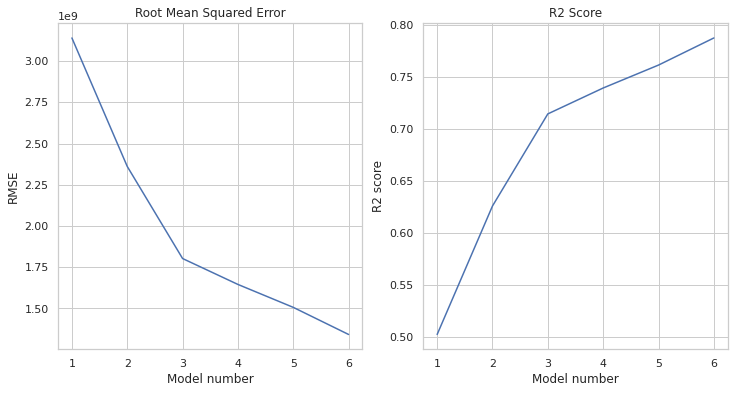

In [ ]:
# Plot RMSE and R2_score values
fig, ax = plt.subplots(1,2)

assert len(rmse_list) == 6, "Restart and run the kernel, to clear RMSE list from excess values!"
ax[0].set(xlabel='Model number', ylabel='RMSE', title='Root Mean Squared Error')
ax[0].plot(range(1,7), rmse_list)

assert len(r2_list) == 6, "Restart and run the kernel, to clear R2 score list from excess values!"
ax[1].set(xlabel='Model number', ylabel='R2 score', title='R2 Score')
ax[1].plot(range(1,7), r2_list)

plt.show()

```
```
```
```
## Optional task
Try to get $R^2$ score > 0.8.

In [ ]:
drop = ['Utilities', 'RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'Alley']

In [ ]:
X = data.drop([*drop, 'SalePrice'], axis=1)
y = np.log1p(data.SalePrice)

In [ ]:
from pandas.api.types import is_numeric_dtype, is_object_dtype

def get_null_df(features:pd.DataFrame) -> pd.DataFrame:
    col_null_df = pd.DataFrame(columns = ['Feature', 'Type', 'Total_NaN', 'Missing'])
    col_null = features.columns[features.isna().any()].to_list()
    for col in col_null:
        dtype = "Numerical" if is_numeric_dtype(features[col]) else "Categorical"
        nulls = len(features[features[col].isna() == True][col])   
        col_null_df = col_null_df.append({'Feature': col, 
                                          'Type': dtype,
                                          'Total_NaN': nulls,
                                          'Missing': (nulls / len(features))*100
                                         }, ignore_index=True)
    return col_null_df

In [ ]:
get_null_df(X)

,Feature,Type,Total_NaN,Missing
0,LotFrontage,Numerical,259,17.739726
1,MasVnrType,Categorical,8,0.547945
2,BsmtQual,Categorical,37,2.534247
3,BsmtCond,Categorical,37,2.534247
4,BsmtExposure,Categorical,38,2.602740
5,BsmtFinType1,Categorical,37,2.534247
6,BsmtFinType2,Categorical,38,2.602740
7,Electrical,Categorical,1,0.068493
8,FireplaceQu,Categorical,690,47.260274
9,GarageType,Categorical,81,5.547945


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
num_cols = list(X.select_dtypes(exclude='object').columns)
cat_cols = list(X.select_dtypes(include='object').columns)


In [ ]:
# Preprocessing for numerical data
numerical_transformer =  Pipeline(steps=[
    ('norm', StandardScaler()),
    ('knn_imputer', KNNImputer(n_neighbors=7, weights='distance'))
    ])

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('norm', StandardScaler(with_mean = False))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

In [ ]:
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', LinearRegression())
                     ])

In [ ]:
reg.fit(X, y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('norm',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('knn_imputer',
                                                                   KNNImputer(add_indicator=False,
                                                                              copy=Tru

In [ ]:
r2_score(y, reg.predict(X))

0.9210171926693662

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.base import clone
# learning - curves - один з способів сказати, що модель досить проста або ж дуже складна
def plot_learning_rate(model, X, y):
    model_copy = clone(model)
    _, train_score, test_score = learning_curve(model_copy, X, y)
    plt.plot(range(train_score.reshape(-1).shape[0]), train_score.reshape(-1), c='red', label='train')
    plt.plot(range(test_score.reshape(-1).shape[0]), test_score.reshape(-1), c='green', label='test')
    plt.legend()
    plt.ylabel('score')

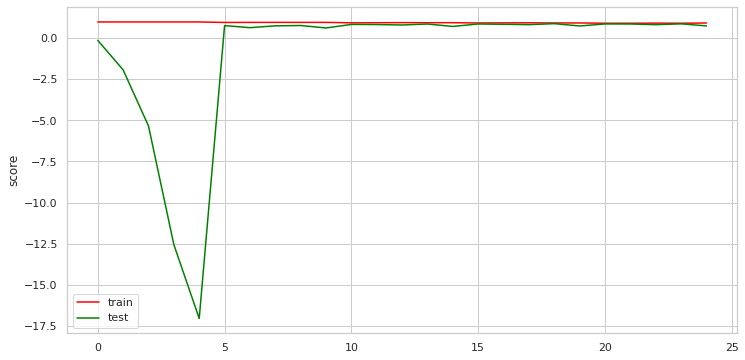

In [ ]:
plot_learning_rate(reg, X, y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def plot_test( model, X, y):
  #Custom version plot learning curves 
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2)
  train_errors, val_errors = [], []
  for m in tqdm(range(1, len(X_train))):
    model.fit(X_train[:m],
              y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict,
                                           y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), 'b--', linewidth=3, label='val')
  plt.legend()
  plt.ylabel('RMSE')




100%|██████████| 1167/1167 [03:46<00:00,  5.16it/s]


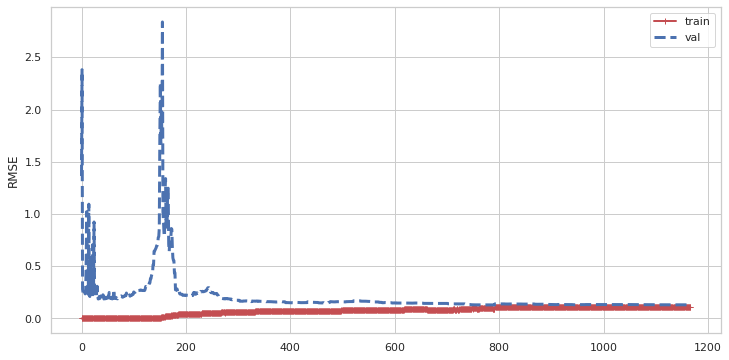

In [ ]:
plot_test(reg, X, y)